In [1]:
#!/usr/bin/env python3
##
import numpy as np
import pandas as pd
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
print("tensorflow version", tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import sys

tensorflow version 2.5.0


In [2]:
## Define image properties:
imgDir = ".\p7"
targetWidth, targetHeight = 200, 500
imageSize = (targetWidth, targetHeight)
channels = 1  # color channels

## define other constants, including command line argument defaults
batch_size = 16
epochs = 5

In [3]:
## command line arguments
import __main__ as main
if hasattr(main, "__file__"):
    print("parsing command line arguments")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("--dir", "-d",
                        help = "directory to read images from",
                        default = imgDir)
    parser.add_argument("--epochs", "-e",
                        help = "how many epochs",
                        default= epochs)
    args = parser.parse_args()
    imgDir = args.dir
    epochs = int(args.epochs)
else:
    print("run interactively from", os.getcwd())
    imageDir = os.path.join(os.path.expanduser("~"),
                            "data", "images", "text", "language-text-images")
print("Load images from", imgDir)
print("epochs:", epochs)

run interactively from C:\Users\ian\Info 371
Load images from .\p7
epochs: 5


In [4]:
import random

In [58]:
## Prepare dataset for training model:
filenames = random.sample(os.listdir(os.path.join(imgDir, "train")), 10000)

categories = []
for file in filenames:
    capitalize = ''.join([c for c in file if c.isupper()])
    categories.append(capitalize)



print(len(filenames), "images found")
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

df = df[df['category'] != "RU"]
df = df[df['category'] != "DA"]


print("data files:")
print(df.sample(5))
nCategories = df.category.nunique()
print("categories:\n", df.category.value_counts())
## Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,\
    MaxPooling2D, AveragePooling2D,\
    Dropout,Flatten,Dense,Activation,\
    BatchNormalization

10000 images found
data files:
                           filename category
8996           evolution_EN-evb.jpg       EN
5328        chinese-laws_ZN-flb.jpg       ZN
1021     ling-chu-ko-pai_ZN-bgs.jpg       ZN
9956  claudes-confession_EN-aiz.jpg       EN
5822        chinese-laws_ZN-gez.jpg       ZN
categories:
 EN    3435
ZN    2217
Name: category, dtype: int64


In [59]:
from PIL import Image

In [ ]:
#1.3 cropping training images

str1 = '/Users/yangyuxin/Documents/Info371/week9/train/'

filenames = os.listdir(os.path.join(imgDir, "train"))
for i in range(len(filenames)):
    d = str1 + filenames[i]
    image = Image.open(d, 'r')
    im1 = image.crop((155, 55, 360, 260))
    d1 = '/Users/yangyuxin/Documents/Info371/week9' + "crop" + filenames[i]
    im1.save(d1, 'JPEG')

In [ ]:
# 1.3 cropping testing images

str2 = '/Users/yangyuxin/Documents/Info371/week9/test/'

filenames = os.listdir(os.path.join(imgDir, "test"))
for i in range(len(filenames)):
    d = str2 + filenames[i]
    image = Image.open(d, 'r')
    im1 = image.crop((155, 55, 360, 260))
    d1 = '/Users/yangyuxin/Documents/Info371/week9' + "crop" + filenames[i]
    im1.save(d1, 'JPEG')

In [22]:
# sequential (not recursive) model (one input, one output)
model=Sequential()

model.add(Conv2D(32,
                 kernel_size=3,
                 strides=2,
                 activation='relu',
                 input_shape=(targetWidth, targetHeight, channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.25))

model.add(Conv2D(64,
                 kernel_size=3,
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.add(Dense(nCategories, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 249, 32)       320       
_________________________________________________________________
batch_normalization (BatchNo (None, 99, 249, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 83, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 83, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 81, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 81, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 40, 64)        0

In [23]:
## Training and validation data generator:
train_generator = ImageDataGenerator(rescale=1./255).\
    flow_from_dataframe(df,
                        os.path.join(imgDir, "train"),
                        x_col='filename', y_col='category',
                        target_size=imageSize,
                        class_mode='categorical',
                        color_mode="grayscale",
                        batch_size=batch_size,
                        shuffle=True)
label_map = train_generator.class_indices
## Model Training:
history = model.fit(
    train_generator,
    epochs=epochs
)

Found 5666 validated image filenames belonging to 2 classes.
Epoch 1/5
355/355 [==============================] - 232s 645ms/step - loss: 0.2797 - accuracy: 0.9852
Epoch 2/5
355/355 [==============================] - 226s 637ms/step - loss: 0.1493 - accuracy: 0.9975
Epoch 3/5
355/355 [==============================] - 230s 647ms/step - loss: 0.0804 - accuracy: 0.9993
Epoch 4/5
355/355 [==============================] - 222s 626ms/step - loss: 0.0477 - accuracy: 0.9981
Epoch 5/5
355/355 [==============================] - 207s 582ms/step - loss: 0.0252 - accuracy: 0.9995


In [24]:
## Test data preparation:
testDir = os.path.join(imgDir, "test")
fNames = random.sample((os.listdir(testDir)), 1000)

categories = []
for file in fNames:
    capitalize = ''.join([c for c in file if c.isupper()])
    categories.append(capitalize)

print(len(fNames), "test images")
testResults = pd.DataFrame({
    'filename': fNames,
    'category': categories
})


testResults = testResults[testResults['category'] != "RU"]
testResults = testResults[testResults['category'] != "DA"]


nb_samples = testResults.shape[0]
print(nb_samples, "test files read from", testDir)
test_generator = ImageDataGenerator(rescale=1./255).\
    flow_from_dataframe(testResults,
                        os.path.join(imgDir, "test"),
                        x_col='filename',
                        class_mode = None,
                        target_size = imageSize,
                        batch_size=batch_size,
                        shuffle = False,
                        # do _not_ randomize the order!
                        # this would clash with the file name order!
                        color_mode="grayscale"
    )

1000 test images
517 test files read from /Users/shenghanwang/Desktop/programming/info371/week9/test
Found 517 validated image filenames.


In [25]:
testResults

,filename,category
0,dracula_EN-bkz.jpg,EN
2,ling-chu-ko-pai_ZN-bss.jpg,ZN
3,chinese-laws_ZN-euv.jpg,ZN
4,dracula_EN-cid.jpg,EN
5,chinese-laws_ZN-aol.jpg,ZN
...,...,...
995,evolution_EN-aka.jpg,EN
996,evolution_EN-bgx.jpg,EN
997,journey_EN-aqj.jpg,EN
998,evolution_EN-cgm.jpg,EN


In [26]:
## Make categorical prediction:
print("predicting")
phat = model.predict(test_generator)
print("Predicted array shape:", phat.shape)
print("Example:\n", phat[:5])

predicting
Predicted array shape: (517, 2)
Example:
 [[0.9866317  0.01336831]
 [0.02116027 0.97883976]
 [0.02116027 0.97883976]
 [0.9866317  0.01336831]
 [0.02116027 0.97883976]]


In [27]:
## Convert labels to categories:
testResults['predicted'] = pd.Series(np.argmax(phat, axis=-1), index=testResults.index)
print(testResults.head())
labelMap = {v: k for k, v in label_map.items()}
testResults["predicted"] = testResults.predicted.replace(labelMap)
print("confusion matrix")
print(pd.crosstab(testResults.category, testResults.predicted))
print("Accuracy", np.mean(testResults.category == testResults.predicted))

                     filename category  predicted
0          dracula_EN-bkz.jpg       EN          0
2  ling-chu-ko-pai_ZN-bss.jpg       ZN          1
3     chinese-laws_ZN-euv.jpg       ZN          1
4          dracula_EN-cid.jpg       EN          0
5     chinese-laws_ZN-aol.jpg       ZN          1
confusion matrix
predicted   EN   ZN
category           
EN         307    0
ZN           6  204
Accuracy 0.988394584139265


Example wrong results
                                 filename category predicted
823               chinese-laws_ZN-bvf.jpg       ZN        EN
334  lin-huang-tien-fei-hsieng_ZN-aba.jpg       ZN        EN
817            bai-li-wa-zhuan_ZN-aap.jpg       ZN        EN
115               chinese-laws_ZN-gum.jpg       ZN        EN
237  lin-huang-tien-fei-hsieng_ZN-ahu.jpg       ZN        EN
43                chinese-laws_ZN-cys.jpg       ZN        EN


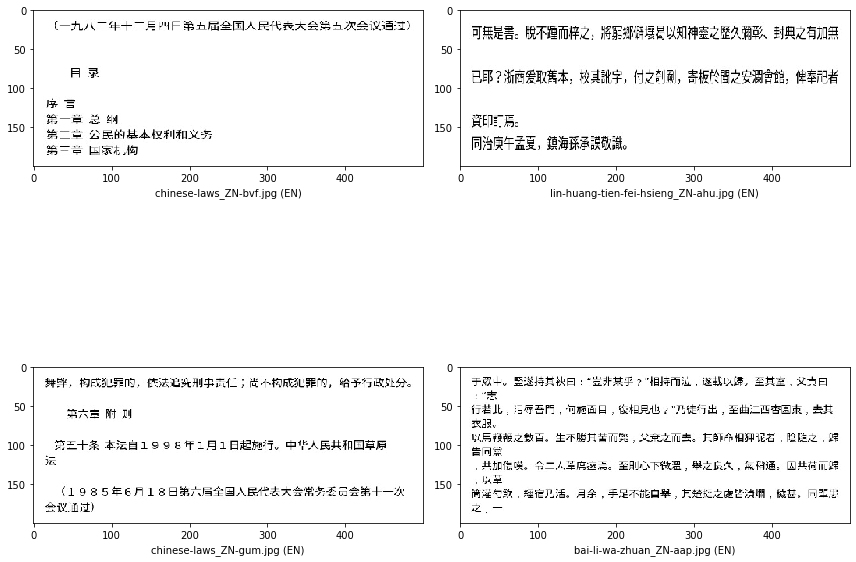

In [28]:
## Print and plot misclassified results
wrongResults = testResults[testResults.predicted != testResults.category]
rows = np.random.choice(wrongResults.index, min(4, wrongResults.shape[0]), replace=False)
print("Example wrong results")
print(wrongResults.sample(min(10, wrongResults.shape[0])))
plt.figure(figsize=(12, 12))
index = 1
for row in rows:
    filename = wrongResults.loc[row, 'filename']
    predicted = wrongResults.loc[row, 'predicted']
    img = load_img(os.path.join(imgDir, "test", filename), target_size=imageSize)
    plt.subplot(2, 2, index)
    plt.imshow(img)
    plt.xlabel(filename + " ({})".format(predicted))
    index += 1
plt.tight_layout()
plt.show()

According to the misclassified images above, we think the reasons why it thinks the above chinese images are english are because, first, there are numbers in some images which there can also be some in English images; secondly, there might be some characters that are too simple which can be recognized as Chinese, lastly, "?" can be appeared in some English images, lead the model to think it is English.

We tried using different layers, changing parameters and image numbers. The best results we got were 98.9%. We ran into problems such as too much loss or just syntax problems.

### 1.4

In [21]:
targetWidth, targetHeight = 205, 205
imageSize = (targetWidth, targetHeight)

In [22]:
## Prepare dataset for training model:
filenames = random.sample(os.listdir(os.path.join(imgDir, "train_crop")), 10000)

categories = []
for file in filenames:
    capitalize = ''.join([c for c in file if c.isupper()])
    categories.append(capitalize)



print(len(filenames), "images found")
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

df = df[df['category'] != "DA"]

print("data files:")
print(df.sample(5))
nCategories = df.category.nunique()
print("categories:\n", df.category.value_counts())
## Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,\
    MaxPooling2D, AveragePooling2D,\
    Dropout,Flatten,Dense,Activation,\
    BatchNormalization

10000 images found
data files:
                                  filename category
3640              cropevolution_EN-eit.jpg       EN
1209  croptolstoy-voina-i-mir-2_RU-cjr.jpg       RU
1301                cropjourney_EN-agr.jpg       EN
9881              cropevolution_EN-clo.jpg       EN
5460           cropchinese-laws_ZN-cyk.jpg       ZN
categories:
 EN    3482
RU    2658
ZN    2164
Name: category, dtype: int64


In [29]:
# sequential (not recursive) model (one input, one output)
model=Sequential()

model.add(Conv2D(12,
                 kernel_size=3,
                 strides=2,
                 activation='relu',
                 input_shape=(targetWidth, targetHeight, channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.25))

# model.add(Conv2D(64,
#                  kernel_size=3,
#                  activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) ## 2 to 3

model.add(Dense(nCategories, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 102, 102, 12)      120       
_________________________________________________________________
batch_normalization_7 (Batch (None, 102, 102, 12)      48        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 34, 12)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 34, 34, 12)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 13872)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1775744   
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)              

In [30]:
## Training and validation data generator:
train_generator = ImageDataGenerator(rescale=1./255).\
    flow_from_dataframe(df,
                        os.path.join(imgDir, "train_crop"),
                        x_col='filename', y_col='category',
                        target_size=imageSize,
                        class_mode='categorical',
                        color_mode="grayscale",
                        batch_size=batch_size,
                        shuffle=True)
label_map = train_generator.class_indices
## Model Training:
history = model.fit(
    train_generator,
    epochs=epochs
)

Found 8304 validated image filenames belonging to 3 classes.
Epoch 1/5
519/519 [==============================] - 24s 45ms/step - loss: 0.6711 - accuracy: 0.7695
Epoch 2/5
519/519 [==============================] - 23s 44ms/step - loss: 0.3844 - accuracy: 0.9509
Epoch 3/5
519/519 [==============================] - 23s 44ms/step - loss: 0.2543 - accuracy: 0.9530
Epoch 4/5
519/519 [==============================] - 23s 45ms/step - loss: 0.1977 - accuracy: 0.9559
Epoch 5/5
519/519 [==============================] - 24s 47ms/step - loss: 0.1689 - accuracy: 0.9575


In [31]:
## Test data preparation:
testDir = os.path.join(imgDir, "test_crop")
fNames = random.sample((os.listdir(testDir)), 1000)

categories = []
for file in fNames:
    capitalize = ''.join([c for c in file if c.isupper()])
    categories.append(capitalize)

print(len(fNames), "test images")
testResults = pd.DataFrame({
    'filename': fNames,
    'category': categories
})

testResults = testResults[testResults['category'] != "DA"]

nb_samples = testResults.shape[0]
print(nb_samples, "test files read from", testDir)
test_generator = ImageDataGenerator(rescale=1./255).\
    flow_from_dataframe(testResults,
                        os.path.join(imgDir, "test_crop"),
                        x_col='filename',
                        class_mode = None,
                        target_size = imageSize,
                        batch_size=batch_size,
                        shuffle = False,
                        # do _not_ randomize the order!
                        # this would clash with the file name order!
                        color_mode="grayscale"
    )

1000 test images
846 test files read from .\p7\test_crop
Found 846 validated image filenames.


In [32]:
## Make categorical prediction:
print("predicting")
phat = model.predict(test_generator)
print("Predicted array shape:", phat.shape)
print("Example:\n", phat[:5])

predicting
Predicted array shape: (846, 3)
Example:
 [[0.91929126 0.06614208 0.0145667 ]
 [0.01370154 0.9786078  0.00769071]
 [0.01387089 0.97833747 0.00779166]
 [0.01370116 0.9786084  0.00769044]
 [0.91671765 0.06781101 0.0154714 ]]


In [33]:
## Convert labels to categories:
testResults['predicted'] = pd.Series(np.argmax(phat, axis=-1), index=testResults.index)
print(testResults.head())
labelMap = {v: k for k, v in label_map.items()}
testResults["predicted"] = testResults.predicted.replace(labelMap)
print("confusion matrix")
print(pd.crosstab(testResults.category, testResults.predicted))
print("Accuracy", np.mean(testResults.category == testResults.predicted))

                                filename category  predicted
0                 cropdracula_EN-dqn.jpg       EN          0
1   croptolstoy-voina-i-mir-2_RU-dbr.jpg       RU          1
2   croptolstoy-voina-i-mir-3_RU-cjk.jpg       RU          1
4  cropderzhavin-duhovnye-ody_RU-abi.jpg       RU          1
5   croprachinskij-1001-tasks_RU-alz.jpg       RU          0
confusion matrix
predicted   EN   RU   ZN
category                
EN         337   10    0
RU          25  251    0
ZN           0    0  223
Accuracy 0.958628841607565


In [12]:
testResults.index

Int64Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,
            ...
            986, 987, 988, 989, 990, 992, 994, 996, 997, 999],
           dtype='int64', length=834)

In [13]:
(pd.Series(np.argmax(phat, axis=-1), index=testResults.index)).unique()

array([2, 1, 0], dtype=int64)

In [70]:
testResults.predicted.unique()

array(['EN', 'ZN', 'RU'], dtype=object)

Example wrong results
                                  filename category predicted
743   croptommy-rem-battle-book_EN-akm.jpg       EN        RU
710   croprachinskij-1001-tasks_RU-alg.jpg       RU        EN
965   croprachinskij-1001-tasks_RU-acs.jpg       RU        EN
943                 cropdracula_EN-aan.jpg       EN        RU
630   croprachinskij-1001-tasks_RU-ago.jpg       RU        EN
25    croprachinskij-1001-tasks_RU-aji.jpg       RU        EN
34    croprachinskij-1001-tasks_RU-apf.jpg       RU        EN
581   croptommy-rem-battle-book_EN-atr.jpg       EN        RU
678               cropevolution_EN-adj.jpg       EN        RU
59   cropderzhavin-duhovnye-ody_RU-atb.jpg       RU        EN


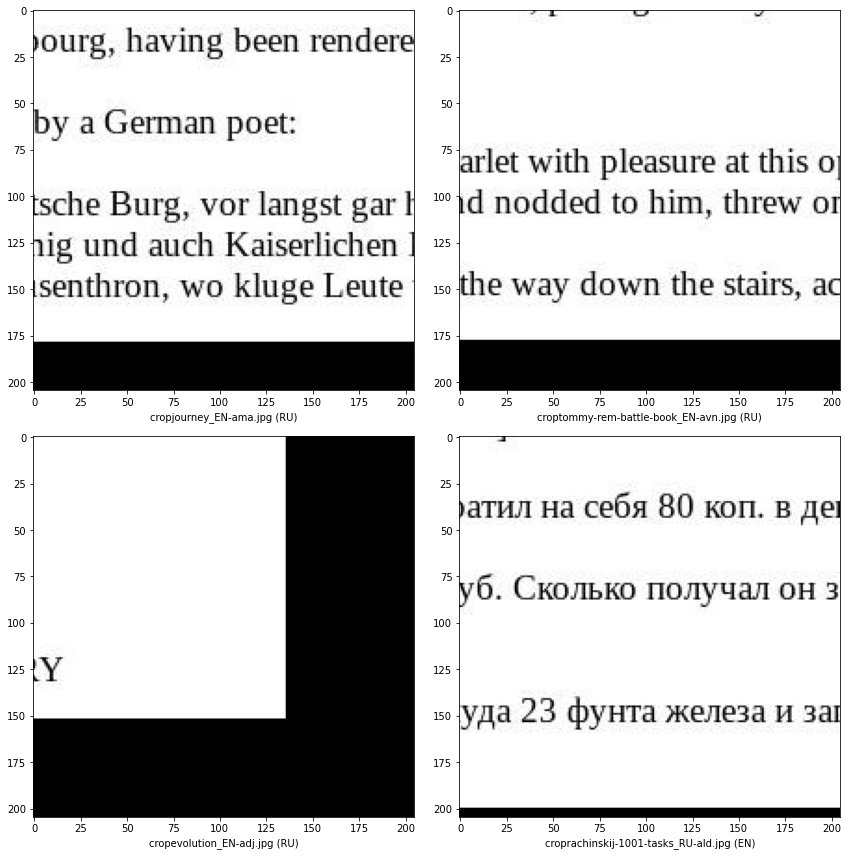

In [34]:
## Print and plot misclassified results
wrongResults = testResults[testResults.predicted != testResults.category]
rows = np.random.choice(wrongResults.index, min(4, wrongResults.shape[0]), replace=False)
print("Example wrong results")
print(wrongResults.sample(min(10, wrongResults.shape[0])))
plt.figure(figsize=(12, 12))
index = 1
for row in rows:
    filename = wrongResults.loc[row, 'filename']
    predicted = wrongResults.loc[row, 'predicted']
    img = load_img(os.path.join(imgDir, "test_crop", filename), target_size=imageSize)
    plt.subplot(2, 2, index)
    plt.imshow(img)
    plt.xlabel(filename + " ({})".format(predicted))
    index += 1
plt.tight_layout()
plt.show()

In [45]:
## Prepare dataset for training model:
filenames = random.sample(os.listdir(os.path.join(imgDir, "train_crop")), 15000)

categories = []
for file in filenames:
    capitalize = ''.join([c for c in file if c.isupper()])
    categories.append(capitalize)



print(len(filenames), "images found")
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

print("data files:")
print(df.sample(5))
nCategories = df.category.nunique()
print("categories:\n", df.category.value_counts())
## Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,\
    MaxPooling2D, AveragePooling2D,\
    Dropout,Flatten,Dense,Activation,\
    BatchNormalization

15000 images found
data files:
                                   filename category
12651  croptolstoy-voina-i-mir-1_RU-cdt.jpg       RU
4102            cropchinese-laws_ZN-gxa.jpg       ZN
6957                 cropdracula_EN-doi.jpg       EN
4097   croptolstoy-voina-i-mir-1_RU-baa.jpg       RU
13064              cropevolution_EN-cyw.jpg       EN
categories:
 EN    5156
RU    3987
ZN    3323
DA    2534
Name: category, dtype: int64


In [108]:
# 92.5%
model=Sequential()

model.add(Conv2D(12,
                 kernel_size=3,
                 strides=2,
                 activation='relu',
                 input_shape=(targetWidth, targetHeight, channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.25))

model.add(Conv2D(24,
                 kernel_size=3,
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(30,
#                  kernel_size=3,
#                  activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.add(Dense(nCategories, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 102, 102, 12)      120       
_________________________________________________________________
batch_normalization_49 (Batc (None, 102, 102, 12)      48        
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 34, 34, 12)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 34, 34, 12)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 24)        2616      
_________________________________________________________________
batch_normalization_50 (Batc (None, 32, 32, 24)        96        
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 24)      

In [109]:
## Training and validation data generator:
train_generator = ImageDataGenerator(rescale=1./255).\
    flow_from_dataframe(df,
                        os.path.join(imgDir, "train_crop"),
                        x_col='filename', y_col='category',
                        target_size=imageSize,
                        class_mode='categorical',
                        color_mode="grayscale",
                        batch_size=batch_size,
                        shuffle=True)
label_map = train_generator.class_indices
## Model Training:
history = model.fit(
    train_generator,
    epochs=epochs
)

Found 15000 validated image filenames belonging to 4 classes.
Epoch 1/5
938/938 [==============================] - 49s 51ms/step - loss: 0.8444 - accuracy: 0.7341
Epoch 2/5
938/938 [==============================] - 47s 50ms/step - loss: 0.5164 - accuracy: 0.8606
Epoch 3/5
938/938 [==============================] - 47s 50ms/step - loss: 0.3689 - accuracy: 0.8877
Epoch 4/5
938/938 [==============================] - 47s 51ms/step - loss: 0.3245 - accuracy: 0.8974
Epoch 5/5
938/938 [==============================] - 47s 50ms/step - loss: 0.2910 - accuracy: 0.9074


In [110]:
## Test data preparation:
testDir = os.path.join(imgDir, "test_crop")
fNames = random.sample((os.listdir(testDir)), 1000)

categories = []
for file in fNames:
    capitalize = ''.join([c for c in file if c.isupper()])
    categories.append(capitalize)

print(len(fNames), "test images")
testResults = pd.DataFrame({
    'filename': fNames,
    'category': categories
})

nb_samples = testResults.shape[0]
print(nb_samples, "test files read from", testDir)
test_generator = ImageDataGenerator(rescale=1./255).\
    flow_from_dataframe(testResults,
                        os.path.join(imgDir, "test_crop"),
                        x_col='filename',
                        class_mode = None,
                        target_size = imageSize,
                        batch_size=batch_size,
                        shuffle = False,
                        # do _not_ randomize the order!
                        # this would clash with the file name order!
                        color_mode="grayscale"
    )

1000 test images
1000 test files read from .\p7\test_crop
Found 1000 validated image filenames.


In [111]:
## Make categorical prediction:
print("predicting")
phat = model.predict(test_generator)
print("Predicted array shape:", phat.shape)
print("Example:\n", phat[:5])

predicting
Predicted array shape: (1000, 4)
Example:
 [[8.9876518e-02 8.9716315e-01 1.2183226e-02 7.7713036e-04]
 [1.9733885e-03 2.9228777e-03 2.1878653e-03 9.9291587e-01]
 [8.9111172e-02 8.9802241e-01 1.2096630e-02 7.6982426e-04]
 [8.9974634e-02 8.9704627e-01 1.2200497e-02 7.7855011e-04]
 [8.3013684e-01 1.0042611e-01 5.8547303e-02 1.0889768e-02]]


In [112]:
## Convert labels to categories:
testResults['predicted'] = pd.Series(np.argmax(phat, axis=-1), index=testResults.index)
print(testResults.head())
labelMap = {v: k for k, v in label_map.items()}
testResults["predicted"] = testResults.predicted.replace(labelMap)
print("confusion matrix")
print(pd.crosstab(testResults.category, testResults.predicted))
print("Accuracy", np.mean(testResults.category == testResults.predicted))

                                  filename category  predicted
0                   cropdracula_EN-cxf.jpg       EN          1
1              cropchinese-laws_ZN-ere.jpg       ZN          3
2                 cropevolution_EN-bty.jpg       EN          1
3     croptommy-rem-battle-book_EN-asm.jpg       EN          1
4  cropaakjaer-samlede-verker-3_DA-ajz.jpg       DA          0
confusion matrix
predicted   DA   EN   RU   ZN
category                     
DA         133   24    1    0
EN          27  301    0    0
RU          12    3  254    0
ZN           4    0    0  241
Accuracy 0.929


Example wrong results
                                    filename category predicted
902  cropaakjaer-samlede-verker-3_DA-csk.jpg       DA        EN
921         cropmagnussen-thisted_DA-apb.jpg       DA        EN
389              cropliu-shouyuan_ZN-anv.jpg       ZN        DA
653  cropaakjaer-samlede-verker-3_DA-ayo.jpg       DA        EN
307  cropaakjaer-samlede-verker-3_DA-cay.jpg       DA        EN
285  cropaakjaer-samlede-verker-3_DA-ajq.jpg       DA        EN
699              cropocean-tramps_EN-agf.jpg       EN        DA
278        cropclaudes-confession_EN-aoc.jpg       EN        DA
98          cropmagnussen-thisted_DA-alh.jpg       DA        EN
826     croptommy-rem-battle-book_EN-awe.jpg       EN        DA


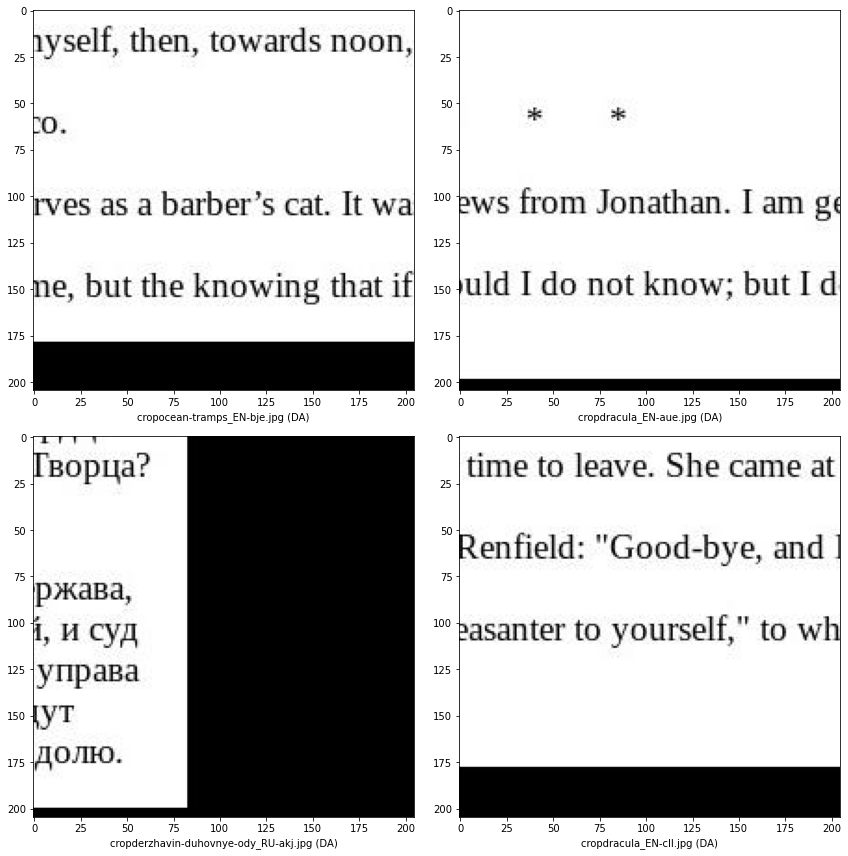

In [113]:
## Print and plot misclassified results
wrongResults = testResults[testResults.predicted != testResults.category]
rows = np.random.choice(wrongResults.index, min(4, wrongResults.shape[0]), replace=False)
print("Example wrong results")
print(wrongResults.sample(min(10, wrongResults.shape[0])))
plt.figure(figsize=(12, 12))
index = 1
for row in rows:
    filename = wrongResults.loc[row, 'filename']
    predicted = wrongResults.loc[row, 'predicted']
    img = load_img(os.path.join(imgDir, "test_crop", filename), target_size=imageSize)
    plt.subplot(2, 2, index)
    plt.imshow(img)
    plt.xlabel(filename + " ({})".format(predicted))
    index += 1
plt.tight_layout()
plt.show()

We also tried using different layers, changing parameters and image numbers. The best result we got for RU, ZN and EN were 95.86%. The best result we got for RU, ZN, DA and EN were 92.9%. We ran into problems such as too much loss or just syntax problems.